In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
from scipy import stats
from datetime  import datetime

In [14]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data Driven AI/realestate_train.csv')
print(df.head())

         date   price   type  bedrooms
0  2010-02-07  525000  house         4
1  2010-02-27  290000  house         3
2  2010-03-07  328000  house         3
3  2010-03-09  380000  house         4
4  2010-03-21  310000  house         3


In [15]:
df.dtypes

date        object
price        int64
type        object
bedrooms     int64
dtype: object

# *1.A. Make sure all columns have the correct data type, e.g., ‘float’ or ‘int’ for numeric quantities, ‘object’ for categorical variables, ‘datetime’ for dates, etc. (1pt)*

In [16]:
df['date']=pd.to_datetime(df['date'])

Here, we have converted the date column type from object to 'datetime'. For this we have made use of to_datetime function from the pandas library.

In [17]:
df.dtypes

date        datetime64[ns]
price                int64
type                object
bedrooms             int64
dtype: object

We can now observe that the all columns have the required data type , price and bedrooms as integers, type as object and date as datetime.

# *1.B. Describe the basic statistics (mean, minimum, maximum, standard deviation, etc.) of the numerical variables. (1pt)*

In [ ]:
#df.describe() gives values in exponents

In [18]:
print("\nMean of Price: ", st.mean(df['price']))
print("\nMedian of Price: ", st.median(df['price']))
print("\nMode of Price: ", st.mode(df['price']))
print("\nMinimum of Price: ", min(df['price']))
print("\nMaximum of Price: ", max(df['price']))
print("\nStandard Deviation of Price: ", st.stdev(df['price']))


Mean of Price:  583838.1130531421

Median of Price:  527000.0

Mode of Price:  500000

Minimum of Price:  56500

Maximum of Price:  8000000

Standard Deviation of Price:  264242.50057272095


In [19]:
print("\nMean of Bedrooms: ", st.mean(df['bedrooms']))
print("\nMedian of Bedrooms: ", st.median(df['bedrooms']))
print("\nMode of Bedrooms: ", st.mode(df['bedrooms']))
print("\nMinimum of Bedrooms: ", min(df['bedrooms']))
print("\nMaximum of Bedrooms: ", max(df['bedrooms']))
print("\nStandard Deviation of Bedrooms: ", st.stdev(df['bedrooms']))


Mean of Bedrooms:  3.2995049504950495

Median of Bedrooms:  3.0

Mode of Bedrooms:  3

Minimum of Bedrooms:  0

Maximum of Bedrooms:  5

Standard Deviation of Bedrooms:  0.9040124178097184


# *2.A. Is the dataset balanced in terms of the type of properties? As a rule of thumb, a ratio of 80:20 can be considered an imbalance. If you would need to correct this imbalance for the prediction task, how would you do it?*

Answer: No, the dataset is not balanced in terms of the types of properties because we can observe that about 86% of the data is classified as house and only about 14% of the data is classified as unit.

To solve this problem of imbalance in the dataset the following methods can be used - 

Oversampling and undersampling change the training data distribution so that the rare (positive) class is well represented. Threshold moving approach ,In general threshold moving moves the threshold, t, so that the rare class tuples are easier to classify (and hence, there is less chance of costly false negative errors)and then finally ensemble techniques can be used.


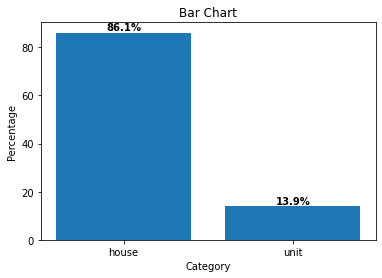

In [20]:
counts = df['type'].value_counts()
percentages = 100 * counts / len(df['type'])
plt.bar(x=counts.index, height=percentages)
plt.ylabel('Percentage')
plt.xlabel('Category')
plt.title('Bar Chart')
for i, v in enumerate(percentages):
    plt.text(i, v+1, f'{v:.1f}%', ha='center', fontweight='bold')

# *B.What is the distribution of the property prices per type of property? According to this data, are houses generally cheaper or more expensive than apartments?*

Ans: The distribution of the property prices per type of property are as shown in the area plot below. 

This plot shows that houses are generally expensive than apartments.

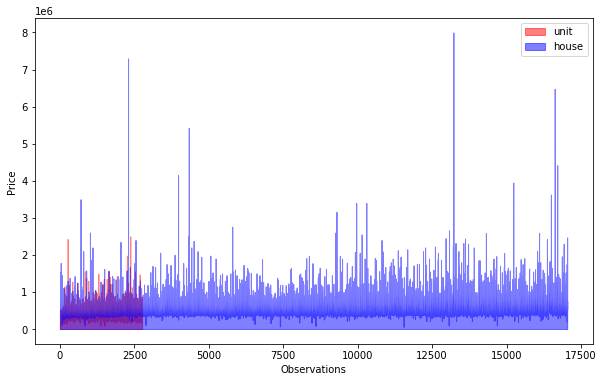

In [21]:
colors = {'unit':'red', 'house':'blue'}
unit_prices = df.loc[df['type'] == 'unit', 'price']
house_prices = df.loc[df['type'] == 'house', 'price']


fig = plt.figure(figsize=(10, 6))
plt.fill_between(range(len(unit_prices)), unit_prices, color=colors['unit'], alpha=0.5)
plt.fill_between(range(len(house_prices)), house_prices, color=colors['house'], alpha=0.5)

plt.xlabel('Observations')
plt.ylabel('Price')
plt.legend(['unit', 'house'])
plt.show()

# *C.What is/are the most common number of bedrooms for the properties in the data?*

Ans: From the Pie chart below we can see that 3 bedroom is the most common number of bedrooms for the properties in the data.

<AxesSubplot:ylabel='bedrooms'>

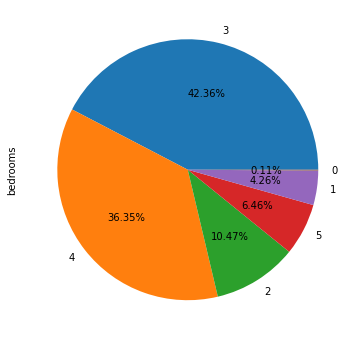

In [22]:
plt.figure(figsize=(6,6))
df['bedrooms'].value_counts().plot(kind='pie',autopct="%.2f%%")

# *D.How do the property prices look over time, per number of bedrooms and type of houses? Describe the tendency if you can observe one.*

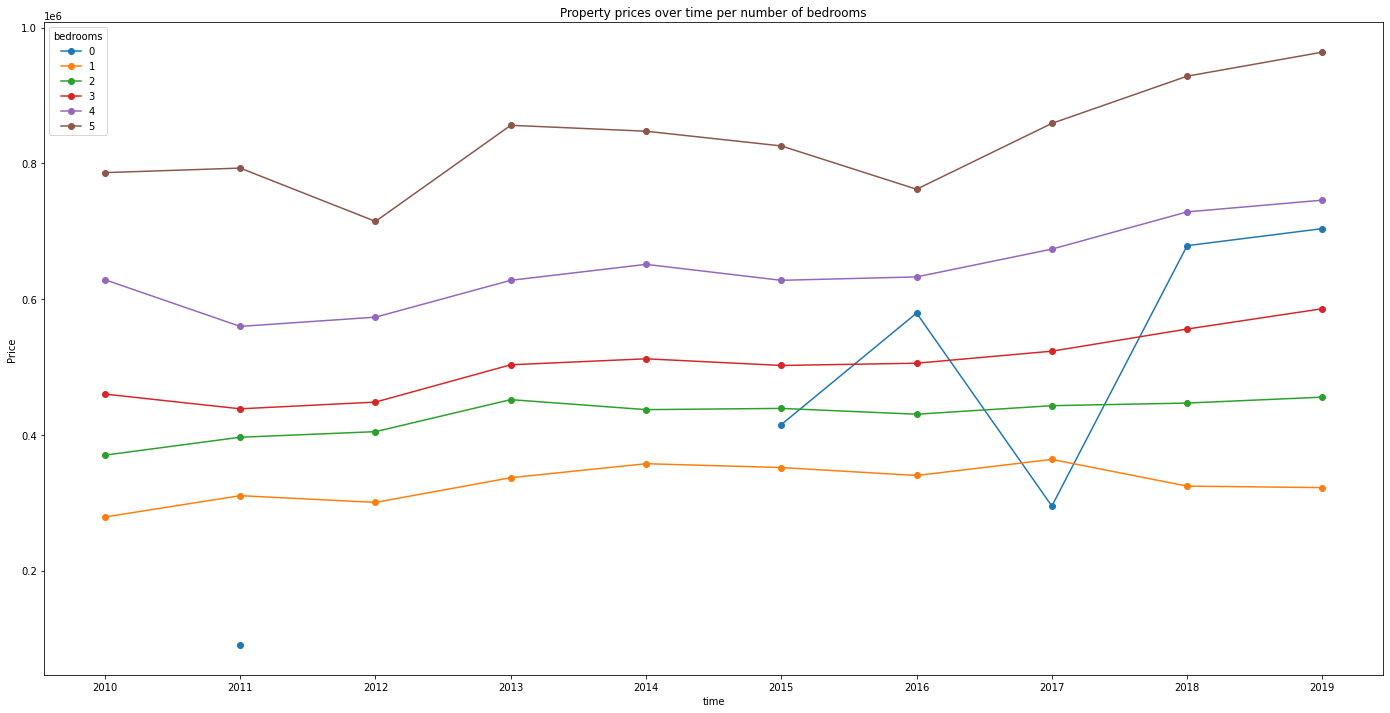

In [23]:
df_copy = df.copy()
df_bd = df_copy.groupby([df_copy['date'].dt.year,'bedrooms'])['price'].mean().unstack().plot(figsize=(24,12),ylabel='Price',xlabel='time',xticks = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019],title='Property prices over time per number of bedrooms',legend = True,marker = 'o')


This graph above shows the property prices over time per number of bedrooms. It can be observed that the price of 5 bedroom properties has been steadily increasing recently, whereas others have remained more or less constant over the years

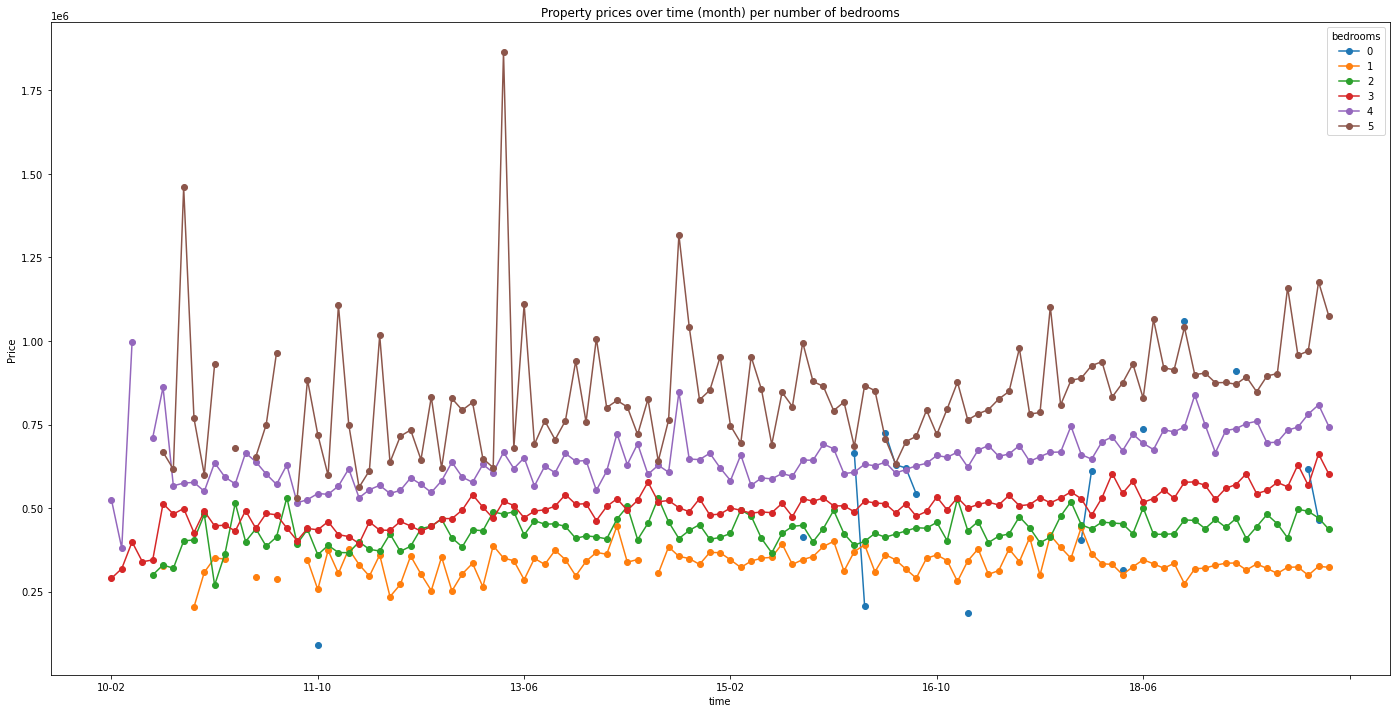

In [24]:
df_bd = df_copy.groupby([df_copy['date'].dt.strftime('%y-%m'),'bedrooms'])['price'].mean().unstack().plot(figsize=(24,12),ylabel='Price',xlabel='time',title='Property prices over time (month) per number of bedrooms',legend = True,marker = 'o')

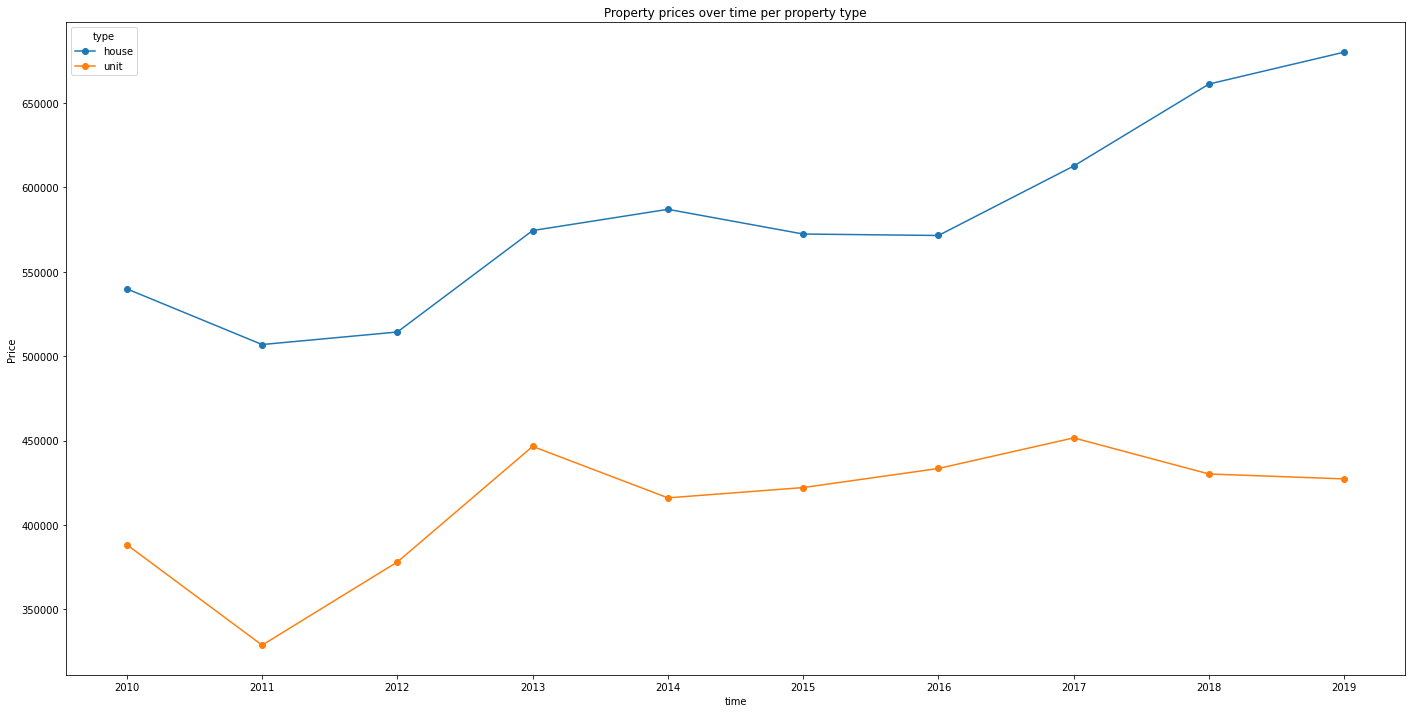

In [25]:
df_tp = df_copy.groupby([df_copy['date'].dt.year,'type'])['price'].mean().unstack().plot(figsize=(24,12),ylabel='Price',xlabel='time',xticks = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019],title='Property prices over time per property type',legend = True,marker = 'o')

The graph above shows the property prices over time based on the type of property (unit or house). Its safe to conclude that houses are expensive than units and the price of houses are increasing over the years.

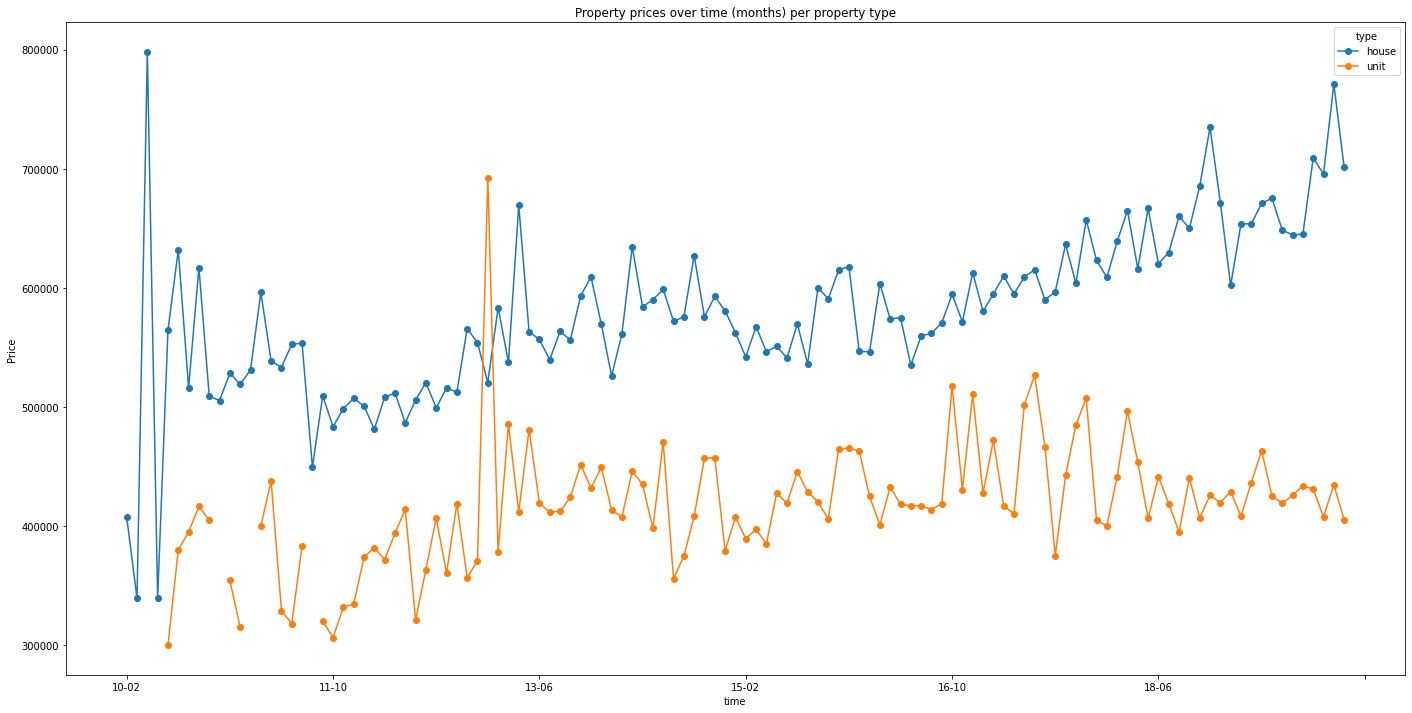

In [26]:
df_tp = df_copy.groupby([df_copy['date'].dt.strftime('%y-%m'),'type'])['price'].mean().unstack().plot(figsize=(24,12),ylabel='Price',xlabel='time',title='Property prices over time (months) per property type',legend = True,marker = 'o')

# *E.Are there outliers in the distribution of property prices per year? Mention methods to correct outliers that can be applied to this dataset.*

Ans: Yes, as seen in the boxplot there are visible outliers in the distribution of property prices per year. The datapoints which are extremely far away from the rest of the cluster are outliers.

There are different methods to correct outliers in this dataset-

1. Trimming - 
This method involves removing a certain percentage of the highest and/or lowest values in the dataset.

2. Winsorizing - 
This method involves replacing the extreme values with a specific percentile value.

In [ ]:
#outliers = df_copy.groupby([df_copy['date'].dt.strftime('%y-%m'),'type'])['price'].mean().unstack().plot(kind = 'box',figsize=(24,12),ylabel='Price',xlabel='time',title='Type Price Change',legend = True)

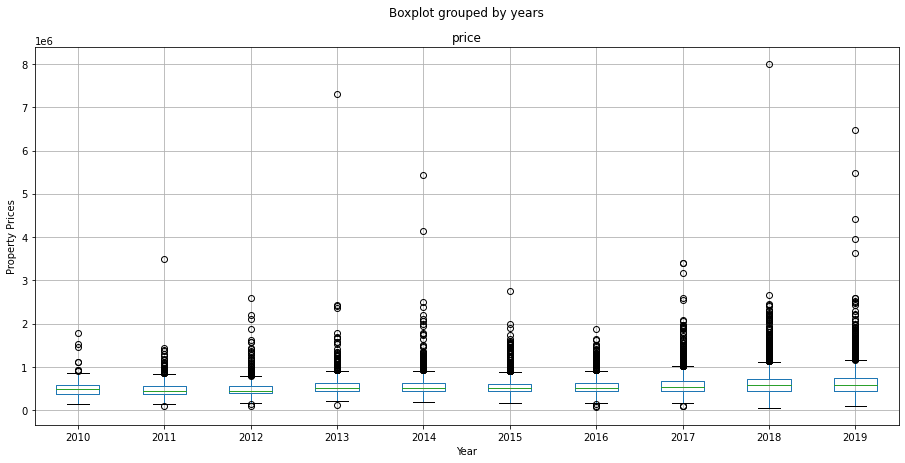

In [27]:
df_copy['years']= df_copy['date'].dt.year
df_box = df_copy.copy()
df_box = df_box.drop(columns='bedrooms')
df_outlier = df_box.boxplot(by = 'years',figsize = (15,7))
plt.xlabel('Year')
plt.ylabel('Property Prices')
plt.show()

# *F. Are there differences in the distribution of property prices per month of the year?*

Yes, although the price level does not change much in most months, there is a clear upward trend in June, September and November, especially in November, the highest price can even reach 8*10^6, combined with the graph in question D, we can find that the price of house belongs to the process of slow fluctuation upward, and the price of unit belongs to the process of fluctuation smooth change. However, if you look at the month, you will find that the price of the year-end month is more likely to be higher than the price of the year-out month, especially in September, October and November, where the price is often the peak value of the year, with an occasional peak in June.


In [ ]:
#df_copy['month']= df_copy['date'].dt.month
#df_box = df_copy.copy()
#df_box = df_box.drop(columns='bedrooms')
#df_box = df_box.drop(columns='years')
#df_outlier = df_box.boxplot(by = 'month',figsize = (15,7))
#plt.show()

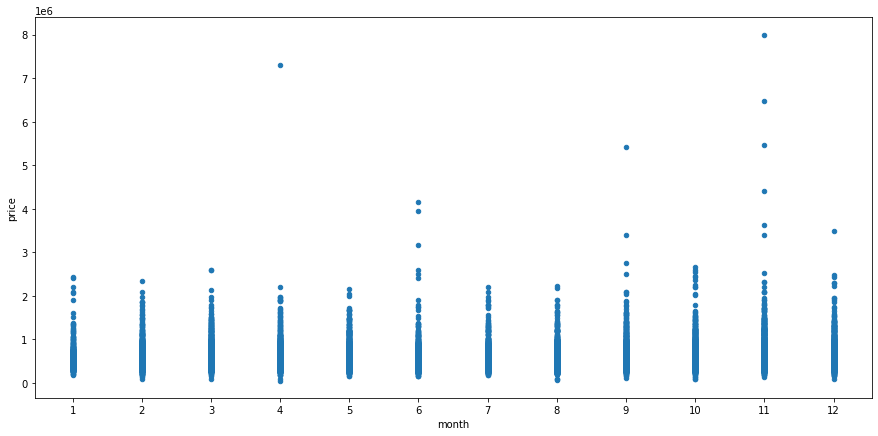

In [ ]:
df_copy['month']= df_copy['date'].dt.month
df_box = df_copy.copy()
df_box = df_box.drop(columns='bedrooms')
df_box = df_box.drop(columns='years')
df_outlier = df_box.plot.scatter(y='price',x='month', xticks = [1,2,3,4,5,6,7,8,9,10,11,12],figsize = (15,7))
plt.show()

# *G. Which variables are highly correlated with property prices, and which are weakly correlated? (1pt)*

Ans: Variables are correlated to price in the below order 

**Bedroom > House = Unit > Years > Month**

In [ ]:
#run only once
one_hot = pd.get_dummies(df['type'])
df_copy = pd.concat([df_copy, one_hot], axis=1)

<AxesSubplot:>

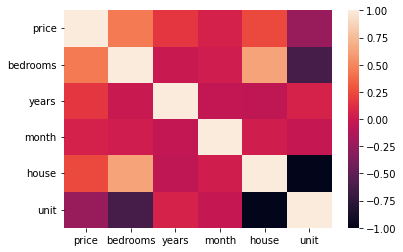

In [ ]:
corr=df_copy.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

The correlation values between prices and other variables are numerically shown below.

In [ ]:
corr

,price,bedrooms,years,month,house,unit
price,1.000000,0.443257,0.156476,0.051807,0.239901,-0.239901
bedrooms,0.443257,1.000000,-0.011011,0.016427,0.631523,-0.631523
years,0.156476,-0.011011,1.000000,-0.039736,-0.056579,0.056579
month,0.051807,0.016427,-0.039736,1.000000,0.023607,-0.023607
house,0.239901,0.631523,-0.056579,0.023607,1.000000,-1.000000
unit,-0.239901,-0.631523,0.056579,-0.023607,-1.000000,1.000000
